#### [Networkx](https://github.com/Ziaeemehr/netsci/blob/main/examples/quick_guide_igraph.ipynb)

#### **Quick Guide for igraph**

Code by : Abolfazl Ziaeemehr 
- https://github.com/Ziaeemehr

<a href="https://colab.research.google.com/github/Ziaeemehr/netsci/blob/main/examples/quick_guide_igraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, ensure that python-igraph is installed. You can install it using pip:

In [1]:
try: 
    import igraph
    print(igraph.__version__)
except ImportError:
    !pip install python-igraph

0.11.6


#### Creating Graphs
- Empty Graph

To create an empty graph:

In [2]:
import igraph as ig
g = ig.Graph()

#### Graph with Nodes and Edges
To create a graph with 10 nodes and specific edges, also get summary of the graph with `print(g)`:

In [3]:
g = ig.Graph(n=10, edges=[[0, 1], [0, 5]])
print(g)

IGRAPH U--- 10 2 --
+ edges:
0--1 0--5


This will display the number of vertices and edges, and list the edges if the graph is small.

#### Assigning Attributes
You can set and retrieve attributes for graphs, vertices, and edges.

In [4]:
import igraph as ig

# Create a graph with 3 nodes
g = ig.Graph(n=3)

# Assign a 'color' attribute to all nodes
g.vs["color"] = ["red", "green", "blue"]

# Assign a 'label' attribute to the first node
g.vs[0]["label"] = "Node 1"

# Assign a 'label' attribute to the second node
g.vs[1]["label"] = "Node 2"

In [5]:
# Create a graph with edges
g.add_edges([(0, 1), (1, 2)])

# Assign a 'weight' attribute to all edges
g.es["weight"] = [1.5, 2.5]

#### Retrieving Attributes

In [6]:
# Get all attributes for the first node
node_attributes = g.vs[0].attributes()
print(node_attributes)

{'color': 'red', 'label': 'Node 1'}


In [7]:
# Get the 'color' attribute for all nodes
colors = g.vs["color"]
print(colors)

['red', 'green', 'blue']


In [8]:
# Get all attributes for the first edge
edge_attributes = g.es[0].attributes()
print(edge_attributes)

{'weight': 1.5}


In [9]:
# Get the 'weight' attribute for all edges
weights = g.es["weight"]
print(weights)

[1.5, 2.5]


#### Load graph from adjacency list

In [55]:
import os
from netsci.utils import list_sample_graphs
from netsci.utils import get_sample_dataset_path

def load_edges(filepath):
    edges = []
    with open(filepath, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue  # Skip comments
            A, B = map(int, line.split())
            edges.append((A, B))
    return edges

def load_graphi(filepath:str, directed:bool=False):
    edges = load_edges(filepath)
    G = ig.Graph(edges=edges, directed=directed)

    return G

path = get_sample_dataset_path()
file_name = os.path.join(path, "collaboration.edgelist.txt")
print(f"{path=}")

G = load_graphi(file_name, directed=False)

print(f"{'Number of vertices:':<30s} {G.vcount():20d}")
print(f"{'Number of edges:':<30s} {G.ecount():20d}")
print(f"{'Is directed:':<30s} {str(G.is_directed()):>20s}")
print(f"{'Density:':<30s} {G.density():20.6f}")
print(f"{'Average clustering coefficient:':30s}{G.transitivity_undirected():20.6f}")


path='/Users/tng/git/workshops/netsci/netsci/datasets/'
Number of vertices:                           23133
Number of edges:                              93439
Is directed:                                  False
Density:                                   0.000349
Average clustering coefficient:            0.264317


#### Visualizing Graphs

In [11]:
# need to install matplotlib and pycairo
# !pip install pycairo -q 

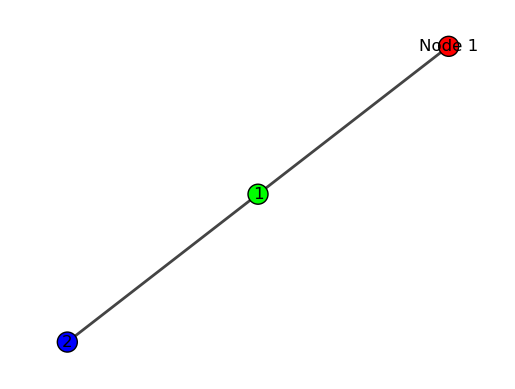

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Compute a layout
layout = g.layout("kk")  # Kamada-Kawai layout

# Define visual style
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label"] = range(g.vcount())
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)  # Bounding box size
visual_style["margin"] = 20

# Plot the graph
ig.plot(g, **visual_style)

# Plot the graph in the axes
ig.plot(g, target=ax, **visual_style)
plt.show()